# Laboratorio 2 - Parte 1. KNN para un problema de clasificación

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/Intro_ML_2025/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
replicating Labs resources


In [2]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L02.01", varname="student");


logging in as dayana.ramirez@udea.edu.co... please wait

-------------
using course session introml::udea.vir.20252
success!! you are logged in
-------------


In [3]:
#configuración del laboratorio
# Ejecuta esta celda!
from Labs.commons.utils.lab2 import *
_, x, y = part_1()
y = y.reshape(np.size(y), 1)

### Tarea 1: Exploración de datos


Usaremos el dataset iris para el problema de clasificación. En el UCI Machine Learning Repository se encuentra más información en el siguiente [link](https://archive.ics.uci.edu/ml/datasets/iris) .

In [ ]:
print("muestra de los 5 primeros renglones de x:\n", x[0:5, :])
print("muestra de los 5 primeros renglones de y:\n", y[0:5])
print ("¿el resultado de esta instrucción que información nos brinda?", x.shape[0])
print ("¿el resultado de esta instrucción que información nos brinda?", x.shape[1])
print ("¿el resultado de esta instrucción que información nos brinda?", len(np.unique(y)))

En un problema de clasificación, tener un desbalance de muestras puede ser perjudicial para el proceso de entrenamiento. Vamos a crear una función para verificar el número de muestras por clases.

In [4]:
#Ejercicio de código
def muestras_por_clases (Y):
    """Función que calcula el número de muestras por cada clase
    Y: vector de numpy con las etiquetas de las muestras del conjunto X
    retorna: diccionario [int/float:int/float]
        con la estructura:{etiquetaclase1: número de muestras clase1, etiquetaclase2: número de muestras clase2}
    """
    dicto = {}

    ## Pista se puede asginar keys a diccionario: dict[etiqueta] = valor
    for clase in np.unique(Y):
        dicto[clase] = np.sum(Y == clase)

    return (dicto)

**Registra tu solución en línea**

In [5]:
student.submit_task(namespace=globals(), task_id='T1');

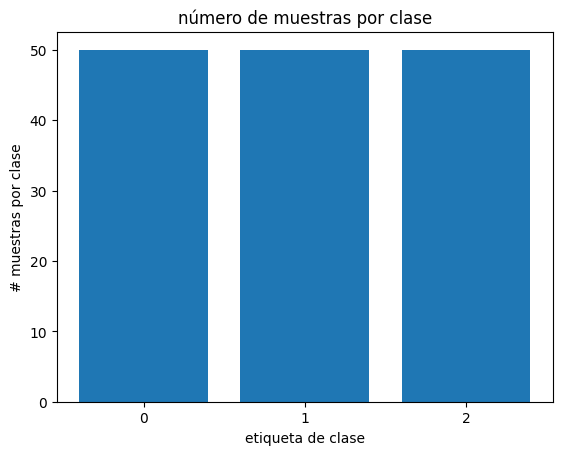

In [6]:
# con esta linea de código puedes ver la dsitribución de forma gráfica
fig, ax = plt.subplots()
ax.bar(muestras_por_clases(y).keys(), muestras_por_clases(y).values())
ax.set_title("número de muestras por clase")
ax.set_xlabel("etiqueta de clase")
ax.set_ylabel("# muestras por clase")
ax.set_xticks(list(muestras_por_clases(y).keys()))
plt.show()


In [7]:
#Pregunta Abierta
#@markdown  ¿Cómo calificaria la distribución de clases desde el punto de vista de un problema de clasificación?
respuesta = "La distribución es ideal para un problema de clasificación supervisada." #@param {type:"string"}

### Tarea 2: Clasificación con K-vecinos

Recordemos los conceptos vistos en la teoría sobre los modelos basados en los K-vecinos más cercanos. En este ejercicio vamos a escribir la función que implementa este modelo. Pero primero vamos a definir la función que nos ayudará a calcular el error de clasificación.

In [22]:
def ErrorClas(Y_lest, Y):
    """función que calcula el error de clasificación
    Y_lest: numpy array con las predicciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)

    return error


Ahora si es hora del ejercicio. Ten en cuenta lo siguiente:

<b>Pistas</b>

1. Para el cáculo de la distancia entre vectores existen varias opciones:
    1. Usar la función la distancia entre matrices `scipy.spatial.distance.cdist`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist))--esta puede ser usada directamente como `cdist(...)`. Entiende la salida de esta función. Al usarla, se logra un rendimiento superior.
    2. Usar la función de distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html))--puede acceder a ella directamente como `euclidean`. Aca debe pensar en un algoritmo elemento a elemento, por lo tanto menos eficiente.
2. También serán de utilidad las funciones `np.sort` y `np.argsort`.
3. Ten presente que la moda es una operación que calcula el valor más común. En el [notebook ya se encuentra cargada esta operacion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html), es posible usarla de esta manera : `mode(y)`

In [8]:
# Ejercicio de codigo
def knn_clasificacion (k, X_train, Y_train, X_test):
    """ Función que implementa el modelo de K-Vecino mas cercanos
        para clasificación
    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida para cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    retorna: las estimaciones del modelo KNN para el conjunto X_test
             esta matriz debe tener un shape de [row/muestras de X_test]
             y las distancias de X_test respecto a X_train, esta matrix
             debe tener un shape de [rows de X_test, rows X_train]
             lo que es lo mismo [muestras de X_test, muestras de X_train]
    """
    if k > X_train.shape[0]:
        print("k no puede ser menor que las muestras de entrenamiento")
        return(None)
    distancias = cdist(X_test, X_train, metric='euclidean')
    Yest = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        vecinos_idx = np.argsort(distancias[i])[:k]
        vecinos_etiquetas = Y_train[vecinos_idx]
        Yest[i] = mode(vecinos_etiquetas, keepdims=False).mode

    return (Yest, distancias)

**Registra tu solución en línea**

In [9]:
student.submit_task(namespace=globals(), task_id='T2');

### Tarea 3: Evaluar el modelo de K-vecinos

Ahora vamos a probar nuestro algoritmo. Pero antes de esto, debemos dividir nuestro conjunto de datos, para lo cual usaremos una función llamada train_test_split de la libreria sklearn. [Aca puedes ver la ayuda](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Entiende su funcionamiento. Vamos a usarla para crear una función con una propoción fija  de 80%-20% entre nuestro conjunto de entrenamiento y de pruebas.

In [26]:
#ejercicio de codigo
def train_test_split_fix(X, y, test_size=0.2, random_state=0):
    """función que divide el conjunto de datos en
        entrenamiento y pruebas usando una proporción
        fija de 20 % (test_size) para el conjunto de pruebas.
        Fije la semilla en cero para que los resultados sean
        reproducibles.

    X: matriz de numpy con las muestras y características
    Y: matriz de numpy con las etiquetas reales
    retorna:
        Xtrain: conjunto de datos para entrenamiento
        Xtest: conjunto de datos para pruebas
        Ytrain: conjunto  de etiquetas para entrenamiento
        Ytest: conjunto de etiquetas para prueba
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    return (X_train, X_test, y_train, y_test)


Vamos a proceder a experimentar. Para ello vamos a crear una función que realiza los experimentos usando las funciones previamente construidas. En el código se hace uso de la función [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), para normalizar los datos.

In [27]:
#Ejercicio de código
def experimentar (ks, X, Y):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas

    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores de las etiquetas

    retorna: dataframe con los resultados
    """

    # dividimos usando la función
    Xtrain, Xtest, Ytrain, Ytest = train_test_split_fix(X,Y,test_size=0.2, random_state=0)

    # se llama el objeto
    scaler = StandardScaler()
    # Se calculan los parametros
    scaler.fit(Xtrain)
    # se usa el objeto con los parametros calculados
    # realizar la normalización
    Xtrain= scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    resultados = pd.DataFrame()
    idx = 0
    for k in ks:
        # iteramos sobre la lista de k's
        resultados.loc[idx,'k-vecinos'] = k
        Yest, dist = knn_clasificacion(k, Xtrain, Ytrain, Xtest)
        resultados.loc[idx,'error de prueba'] = ErrorClas(Yest, Ytest)
        idx+=1

    return (resultados)

In [12]:
#@title Pregunta Abierta
#@markdown ¿Qué tipo de normalización ejecuta la función `StandardScaler`?
respuesta = "Realiza una estandarización, transformando cada característica para que tenga media 0 y desviación estándar 1." #@param {type:"string"}

**Registra tu solución en línea**

In [29]:
student.submit_task(namespace=globals(), task_id='T3');

Ahora ejecuta los experimentos con k = 2,3,4,5,6,7,10

In [28]:
resultados = experimentar ([2,3,4,5,6,7,10], x, y)
resultados

/tmp/ipython-input-3300752242.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Yest[i] = mode(vecinos_etiquetas, keepdims=False).mode
/tmp/ipython-input-3300752242.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Yest[i] = mode(vecinos_etiquetas, keepdims=False).mode
/tmp/ipython-input-3300752242.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Yest[i] = mode(vecinos_etiquetas, keepdims=False).mode
/tmp/ipython-input-3300752242.py:24: DeprecationWarning

,k-vecinos,error de prueba
0,2.0,-10.100000
1,3.0,-10.100000
2,4.0,-10.100000
3,5.0,-9.866667
4,6.0,-9.866667
5,7.0,-9.866667
6,10.0,-9.866667


### Tarea 4: Ventana de Parzen

Ahora vamos a utilizar el metodo de ventana de parzen. Debemos recordar de las clases teóricas, que para aplicar este método, debemos usar una función kernel. En la siguiente celda se proponen dos funciones para:
1. Cálculo de un kernel gausiano
2. Cálculo de la ventana de parzen, es decir del término: $ \sum_{i=1}^{N} K(u_i)$, siendo $\;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$ y la función $K$ el kernel gausiano

In [30]:
def kernel_gaussiano(x):
    """Calcula el kernel gaussiano de x
    x: matriz/vector de numpy
    retorna: el valor de de kernel gaussiano
    """
    return np.exp((-0.5)*x**2)

def ParzenWindow(x,Data,h):
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma


In [31]:
#@title Pregunta Abierta
#@markdown ¿Qué objetivo tiene la función kernel? Contestar en el contexto del método de la ventana de parzen
respuesta = "El kernel actúa como una función de peso, definiendo cuánto contribuye cada muestra al valor de la ventana de Parzen en el punto evaluado." #@param {type:"string"}

Una vez entendidos los anteriores metodos, los vamos a usar para resolver el ejercicio de código.

In [36]:
#ejercicio de código
def parzenClass(h, Xtrain, Ytrain, Xtest):
    """ Función que implementa el método de ventana de parzen
        para clasificación

    h (float): ancho de la ventana
    Xtrain: matriz con las muestras de entrenamiento
    Ytrain: vector con los valores de salida para cada una de las muestras de entrenamiento

    retorna: - las estimaciones del modelo parzen para el conjunto Xtest
              esta matriz debe tener un shape de [row/muestras de Xtest]
             - las probabilidades obtenidas con el método de vetana de Parzen para cada clase [row/muestras de Xtest, número de clases]
    """

    ## pista: recuerde el termino que acompaña al sumatoria (N)
    Ytrain = Ytrain.ravel()
    clases = np.unique(Ytrain)
    Ntest = Xtest.shape[0]
    Nclases = len(clases)

    fds_matrix = np.zeros((Ntest, Nclases))
    Yest = np.zeros(Ntest)

    for i, x in enumerate(Xtest):
        for j, c in enumerate(clases):
            Xc = Xtrain[Ytrain == c]
            fds_matrix[i, j] = (1 / Xc.shape[0]) * ParzenWindow(x, Xc, h)
        Yest[i] = clases[np.argmax(fds_matrix[i, :])]

    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en Xtest, en el mismo orden.
    return Yest, fds_matrix

**Registra tu solución en línea**

In [33]:
student.submit_task(namespace=globals(), task_id='T4');

### Tarea 5 - Validar modelo ventana con Parzen

Ahora vamos a realizar los experimentos, recordar usar la misma metodologia de validación, usando la función previamente creada.

In [37]:
#ejercicio de código
def experimentarParzen (hs, X, Y):
    """Función que realiza los experimentos con el modelo de Venatan de Parzen usando
       una estrategia de validación con entrenamiento y pruebas

    hs: List[int/float] lista con los valores de h a usar
    X: matriz con el conjunto de muestras de la base de datos
    Y: vector de numpy con los valores de las etiquetas de clase de cada muestra

    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - el ancho de la ventana y el error medio de prueba
    """


    resultados = pd.DataFrame()
    idx = 0
    Xtrain, Xtest, Ytrain, Ytest = train_test_split_fix(X, Y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    #normalizamos los datos
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    # iteramos sobre los valores de hs
    for h in hs:

        Yest, probabilidades = parzenClass(h, Xtrain, Ytrain, Xtest)
        resultados.loc[idx,'ancho de ventana'] = h
        resultados.loc[idx,'error de prueba'] = ErrorClas(Yest, Ytest)

        idx+=1
    return (resultados)

**Registra tu solución en línea**

In [41]:
student.submit_task(namespace=globals(), task_id='T5');

In [38]:
hs = [0.05, 0.1, 0.5, 1, 2, 5, 10]
experimentos_parzen = experimentarParzen(hs,x,y)
experimentos_parzen

,ancho de ventana,error de prueba
0,0.05,-10.100000
1,0.10,-10.100000
2,0.50,-10.100000
3,1.00,-10.100000
4,2.00,-10.333333
5,5.00,-10.100000
6,10.00,-10.100000


In [39]:
#@title Pregunta Abierta
#@markdown ¿En el método de ventana de parzen, porqué no hay necesidad de definir el número de vecinos cercanos?
respuesta = "Porque la ventana (definida por h) controla automáticamente cuántos puntos efectivamente influyen en la decisión." #@param {type:"string"}

In [40]:
#@title Pregunta Abierta
#@markdown ¿Por qué el KNN y la ventana de parzen son modelos no parámetricos?
respuesta = "Son no paramétricos porque la complejidad del modelo crece con los datos y no está definida por un conjunto fijo y pequeño de parámetros." #@param {type:"string"}